In [23]:
# numpy library
import numpy as np
#matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)
#pandas
import pandas as pd
#Reading data
data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [24]:
#collecting X ad Y 

X = data.values[:,2]
Y = data.values[:,3]

X.shape,Y.shape

((237,), (237,))

In [25]:
# Mean X and Y

mean_x = np.mean(X)
mean_y = np.mean(Y)
    
#Total number of values
n = len(X)
numerator= 0
denominator=0
for i in range(n):
    numerator   += ((X[i] - mean_x) * (Y[i] - mean_y))
    denominator += ((X[i] - mean_x) ** 2)
        
#calculating values of m and c
m = numerator/ denominator
c = mean_y - m * mean_x
    
print(m,c)

0.26342933948939945 325.57342104944223


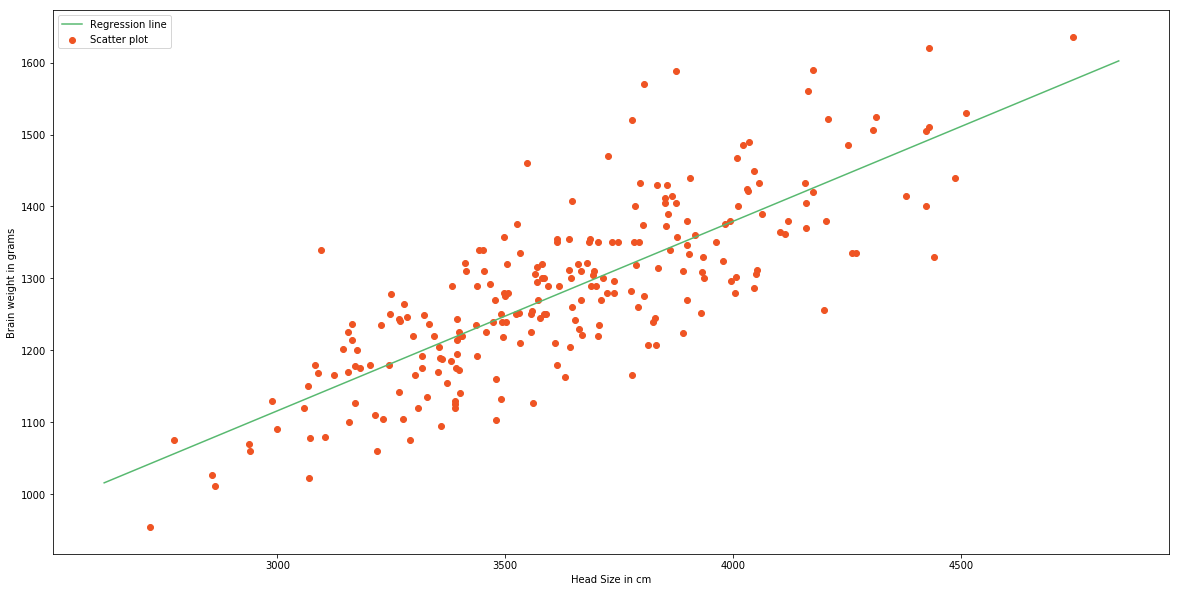

In [26]:
#plotting values and regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values x and y
x = np.linspace(min_x,max_x,1000)
y = c+m*x

#plotting line
plt.plot(x,y,color='#58b970', label = 'Regression line')

#plotting scatter points
plt.scatter(X,Y, c = '#ef5423', label ='Scatter plot')

plt.xlabel('Head Size in cm')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()


In [27]:
#calculate R2 to evaluate model

ss_t = 0
ss_r = 0

for i in range(n):
  y_pred = c + m * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [28]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [29]:
#Reshape the input data into 2D array as scikit learn cannot use Rank 1 matrix
X = X.reshape(len(X),1)

#creating model
reg = LinearRegression()
#fitting training data
reg=reg.fit(X,Y)
#Y Prediction
y_predictions = reg.predict(X)

print("R-squared :",reg.score(X,Y))

R-squared : 0.639311719957
